In [1]:
#preliminaries
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

In [2]:
#Load data from URLs
# Import package
from urllib.request import urlretrieve

# Assign url of file: url
url1 = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'

# Read file into a DataFrame and print its head
cols1 = ['period', 'practice', 'practicename', 'centrename', 'street', 'city', 'county', 'postcode']
practicedataset = pd.read_csv(url1, header=None, names=cols1, index_col=False, skiprows=1)
practicedataset.head()

,period,practice,practicename,centrename,street,city,county,postcode
0,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
2,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE
3,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201512,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT


In [3]:
url2 = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
cols2 = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
prescribingdataset = pd.read_csv(url2, header=None, names=cols2, index_col=False, skiprows=1)
prescribingdataset.head()

MemoryError: 

In [ ]:
#Merge the two datasets
twodatasets= pd.merge(left= prescribingdataset, right= practicedataset, on='practice')
twodatasets.head()

In [ ]:
#Select only Southampton 

twodatasets_s= twodatasets[twodatasets['city'].str.contains('SOUTHAMPTON')]
twodatasets_s.head()

In [ ]:
#Produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column).
Total_city_act_cost = twodatasets_s['act_cost'].sum()
Total_city_quantity = twodatasets_s['quantity'].sum()

print (Total_city_act_cost,",", Total_city_quantity)


In [ ]:
#Find the top ten most/least frequently prescribed medications across all practices (quantity column)
 
quantity_sorted= twodatasets_s.sort_values('quantity', axis=0, ascending=False, kind='quicksort', na_position='last')
quantity_top10 = quantity_sorted.head(10)
quantity_top10
print("The top ten most frequently prescribed medications are:",quantity_top10.bnf_name)
quantity_least10 = quantity_sorted.tail(10)
print("The top ten least frequently prescribed medications are:",quantity_least10.bnf_name)


In [ ]:
#What is their total actual cost 

Total_act_cost_top10 = quantity_top10['act_cost'].sum()
Total_act_cost_least10 = quantity_least10['act_cost'].sum()
print("The total actual cost of the top 10 and least 10 prescribed medications are: ", Total_act_cost_top10, ",", Total_act_cost_least10)



In [ ]:
#How does the total actual cost compare to the overall actual costs of each practice and of the entire city?

#Total actual cost of each practice
costofeachpractice=twodatasets_s.groupby('practice')[('act_cost')].sum().reset_index()

print("The top ten and least ten prescribed medications total actual cost is: ", Total_act_cost_top10,",", Total_act_cost_least10) #total actual cost top 10 and least 10
print("The total actual cost of each practice is: ", costofeachpractice) #total actual cost of each practice
print("The total actual cost of Southampton is: ", Total_city_act_cost) #total actual cost of entire city

In [ ]:
#Find the top ten most expensive medications and calculate their total actual cost

cost_sorted= twodatasets_s.sort_values('act_cost', axis=0, ascending=False, kind='quicksort', na_position='last')
cost_top10 = cost_sorted.head(10)
print(cost_top10)
print("\n")
Total_cost_mostexpensive = cost_top10['act_cost'].sum()
print("The total cost of the top ten most expensive medications is: ", Total_cost_mostexpensive)


In [ ]:
#How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?
#Select only Cambridge
twodatasets_c= twodatasets[twodatasets['city'].str.contains('CAMBRIDGE')]

#Produce a table with the total number of prescriptions and their total actual cost (in Cambridge)
Total_cambridge_cost = twodatasets_c['act_cost'].sum()
Total_cambridge_quantity = twodatasets_c['quantity'].sum()
print ("Prescribing costs and frequency of prescriptions in Southampton is", Total_city_act_cost, ",", Total_city_quantity) 
print("Prescribing costs and frequency of prescriptions in Cambridge is", Total_cambridge_cost, ",", Total_cambridge_quantity)

In [12]:
#Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

import pandas as pd
from pandasql import PandaSQL
pdsql = PandaSQL()


# Assign url of file: url
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
# Save file locally
urlretrieve(url, 'Practicedata.csv')

# Read file into a DataFrame and print its head
cols1 = ['period', 'practice', 'practicename', 'centrename', 'street', 'city', 'county', 'postcode']
practicedataset_sql = pd.read_csv('Practicedata.csv', header=None, names=cols1, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
print(practicedataset_sql.head())

print (pdsql("SELECT * FROM twodatasets ORDER BY practice DESC;, locals()))
   

SyntaxError: EOL while scanning string literal (<ipython-input-12-6fdbd617fa88>, line 18)

In [ ]:
# Assign url of file: url
url_3 = 'https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
demo = pd.read_csv(url_3)
demodataset = demo.rename(columns = {'GP_PRACTICE_CODE':'practice', 'POSTCODE':'postcode'})

demodataset



In [ ]:
#Merge the two datasets

threedatasets= pd.merge(left=twodatasets, right=demodataset, on='practice')
threedatasets.head()

In [ ]:
#1.Calculate the monthly total spending for each GP-practice. 
monthlytotal = threedatasets.groupby('practice')['act_cost'].sum().reset_index()
monthlytotal.head()

In [ ]:
#2.Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

totalall = demodataset.groupby('practice')['Total_All'].sum().reset_index()
totalall.head()

In [ ]:
monthlyandtotal = pd.merge(left=monthlytotal, right= totalall, on='practice')
monthlyandtotal.head()

In [ ]:
monthlyandtotal['relativecosts'] = monthlyandtotal['act_cost']/monthlyandtotal['Total_All']
monthlyandtotal['relativecosts'] #relative costs per patient

In [ ]:
monthlyandtotal.head()

In [ ]:
#Monthlyandtotal only for Southampton
a=twodatasets_s.practice.unique().tolist()
b=monthlyandtotal.practice.isin(a)
monthlyandtotal_s= monthlyandtotal[b]


In [ ]:
monthlyandtotal_s

NameError: name 'monthlyandtotal' is not defined

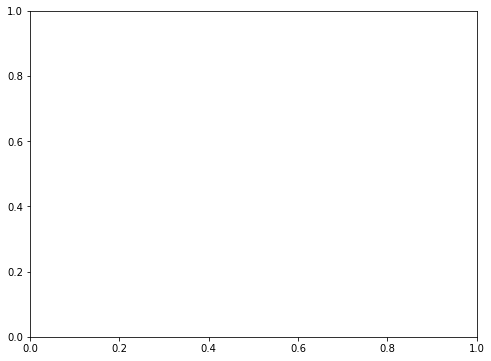

In [6]:
#3.Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot
#Create a scatterplot
from math import floor
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= monthlyandtotal['act_cost']
y = monthlyandtotal['Total_All']
x1= monthlyandtotal_s['act_cost']
y1= monthlyandtotal_s['Total_All']
ax.scatter(x, y, color='#FFBAD2')
ax.scatter(x1, y1, color='blue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title("Monthly total spending per registered patients (all GP-practices)")
ax.set_xlabel("Monthly costs",fontsize=12)
ax.set_ylabel("Registered patients",fontsize=12)
max_x = floor(monthlyandtotal.act_cost.max())
max_y = floor(monthlyandtotal.Total_All.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)
ax.legend()

In [ ]:
z= monthlyandtotal['relativecosts']
z

In [ ]:
#4.Visualize the relative costs per patient of all national GP-practices in a histogram.

cost_patient_plot = merged
cost_patient_plot['cost_per_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['Total_All'] 

x = cost_patient_plot.cost_per_patient.values

plt.hist(x, bins=75)
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")

min_x = floor(cost_patient_plot['cost_per_patient'].quantile(.01))
max_x = floor(cost_patient_plot['cost_per_patient'].quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.title("GP practice monthly total prescription spending per registered patient")
plt.show()




z= monthlyandtotal['relativecosts']
num_bins = 5
n, bins, patches = plt.hist(z, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
#5.Use descriptive statistics to show how your assigned city compares to the national level.
#Descriptive statistics southampton vs national
